1. Bank Personal Loaning Model

1.1 _Introduction_
This report outlines the methodology and findings from the analysis of the Bank_Personal_Loan_Modelling dataset. The objective is to check for patterns that predict customer behavior in accepting personal loans and Model buildong.

1.2. _Literature Review_

1.3. _Data Description_
The file Bank_Personal_Loan_Modelling.csv has data on 5000 customers. The data contains customer demographic information (income, age, etc.), what kind of relationship the customers have with the bank ( securities account ,mortgage, etc.), and the customers feedback as regards to the last personal loan drive (Personal Loan). out of all these 5000 customers, only about 480 (= ~10%) collected the personal loan that was proposed to them in the earlier crusade.

1.4. _Data Attributes_
ID: Customer identification number
Age: Customer's age in years
Experience: Number of years of professional experience
Income: Annual income of the customer (in thousands of dollars)
ZIP Code: Home address ZIP code
Family: Family size of the customer
CCAvg: Average spending on credit cards per month (in thousands of dollars)
Education: Education level with ordinal encoding (1: Undergrad; 2: Graduate; 3: Advanced/Professional)
Mortgage: Value of house mortgage if any (in thousands of dollars)
Personal Loan: Whether the customer accepted a personal loan in the last campaign (1: Yes, 0: No)
Securities Account: Whether the customer has a securities account with the bank (1: Yes, 0: No)
CD Account: Whether the customer has a certificate of deposit (CD) account with the bank (1: Yes, 0: No)
Online: Whether the customer uses internet banking facilities (1: Yes, 0: No)
CreditCard: Whether the customer uses a credit card issued by the bank (1: Yes, 0: No)

1.5. _Methodology_

1.6. _Objectives_
The classification _Target_ is to predict the chance of a liable customer Accepting personal loans which implies we have to build a model which will be used to predict which of the customers are will probably to accept the offer for personal loan, via the specific relationship with the bank across different features shown in the dataset. in this research I will be using the Supervised Learning methods to predict which model is best for this problem amongst Logistic Regresssion, , K-Nearest Neighbors(KNN), and and Naive Bayes Algorigthm.. 


2. Exploratory Data Analysis
2.1 _Library Load_

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')





from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy
from sklearn import preprocessing

from the libraries I added I will used pandas, numpy, matplotlib, seaborn, scipy for EDA and Data Visualization. I will also use sklearn for data spliting, model building and for confusion matrix.

2.2 Data Importation
_Reading and Visualising the Dataset_ 

In [2]:
df = pd.read_csv(r"C:\Users\pappy\OneDrive\ZAH\Desertation/Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


I have loaded the Personal Loan dataset using  pandas read_csv() function. df is my dataframe. I have used function head() to display first 5 records of the dataset.

2.3 Exploration of the Dataset

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


This is the data head
The first 5 elements are displayed

In [4]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


This is the data tail
The last 5 elements are displayed

In [5]:
print("No.of Rows and Columns:",df.shape)

No.of Rows and Columns: (5000, 14)


The  DatFrame shape is: (5000, 14), meaning there are 5000 rows and 14 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There 13 integer columns, 1 column that contains a float from which personal_loan, securities_account, cd_account, online, creditcard have logical binary values(0,1).

The column personal_loan is our target variable.


The variable ID has no ineteresting addition. 

The binary category have five variables as below:
Personal Loan - during the last crusade did this custtomer accept the personal loan? 
CD Account - does this particular customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer in question use internet banking facilities?
Credit Card - Does the particular customer use a credit card issued by UniversalBank?

Ordinal Categorical Variables are:
Family - the size of the customer family
Education - What is the customer level of education

Interval (numeric) variables are as below:
Age - Tell's us the age of the customer
Experience - his/her years of experience
Income - Annual income in pounds
CCAvg - his/her aerage credit card spending
Mortage - the customers value of House Mortgage

The nominal variable is :
ID
Zip Code

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


ID: With a count of 5000, the IDs range from 1 to 5000
Age: The average age = 45 years, with a standard deviation of around 11.46 years. The ages range from 23 to 67 years old.
Experience: On average, customers have 20 years of professional experience. However, the minimum value is -3, which may indicate some data entry errors.a negative years of experience is not plausible.
Income: The average annual = £73,774 with a wide range in incomes, standard deviation = ~£46,034 and a maximum income of £224,000.
ZIP Code: ZIP codes range from 9307 to 96651, 
Family: The average size of the customer's family is around 2.4, and families range from 1 to 4 members.
CCAvg: The average credit card spending = £1.94k with a maximum spending of £10k, indicatiing high spenders
Education: The scale of education is from 1 to 3, where the mean is approximately 1.88, 
Mortgage: The average mortgage amount is £56.5k, but with a large standard deviation of about £101.7k, with a maximum at £635k.
Personal Loan: Only 9.6% of customers have accepted a personal loan, given the mean is close to 0.1 
Securities Account: About 10.4% of customers have a securities account with the bank.
CD Account: 6.04% of customers have a certificate of deposit (CD) account with the bank.
Online: Almost 60% of customers use online banking facilities.
CreditCard:Close to 29.4% of customers have a credit card issued by the bank.

Important: We can see that the lowest number in the Experience column is -3.0, which might be wrong since Experience can't be poor. I will fix it in the part where I clean up the data and fix errors.
The data for the binary variables "Personal Loan," "Credit Card," "Online," "CD Account," and "Security Account" is clean.
Both "Family" and "Education" in Ordinary Cat are also clean.
The target variable looks good too.

In [9]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: >

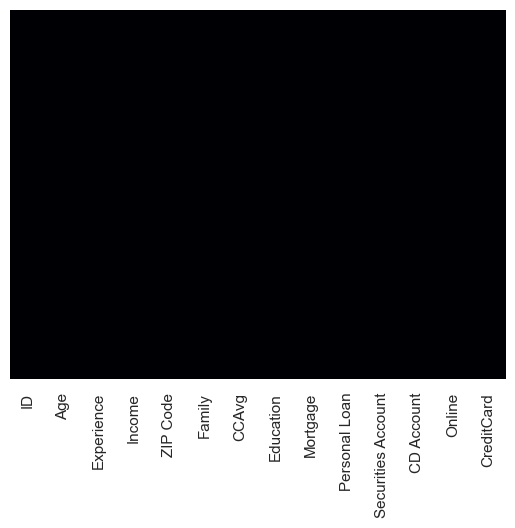

In [10]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='magma')


From the output we can deduce that there are no missing values in the table though that doesnt neccesarily mean that we won't do some cleaning. 

In [11]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

With the df.info() function, we can also see what kinds of data are in a dataframe, which is even more important information.

2.4 Data Preparation

Since our target column is (Personal Loan) and it in the middle of the dataframe, so I will move it to the end of the dataframe to make things easier.

In [12]:
pl = df['Personal Loan']
df = df.drop(['Personal Loan'], axis=1)
df['Personal Loan'] = pl
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


The tragedy column has now been added to the end of the dataframe.

Visualisizing the whole table

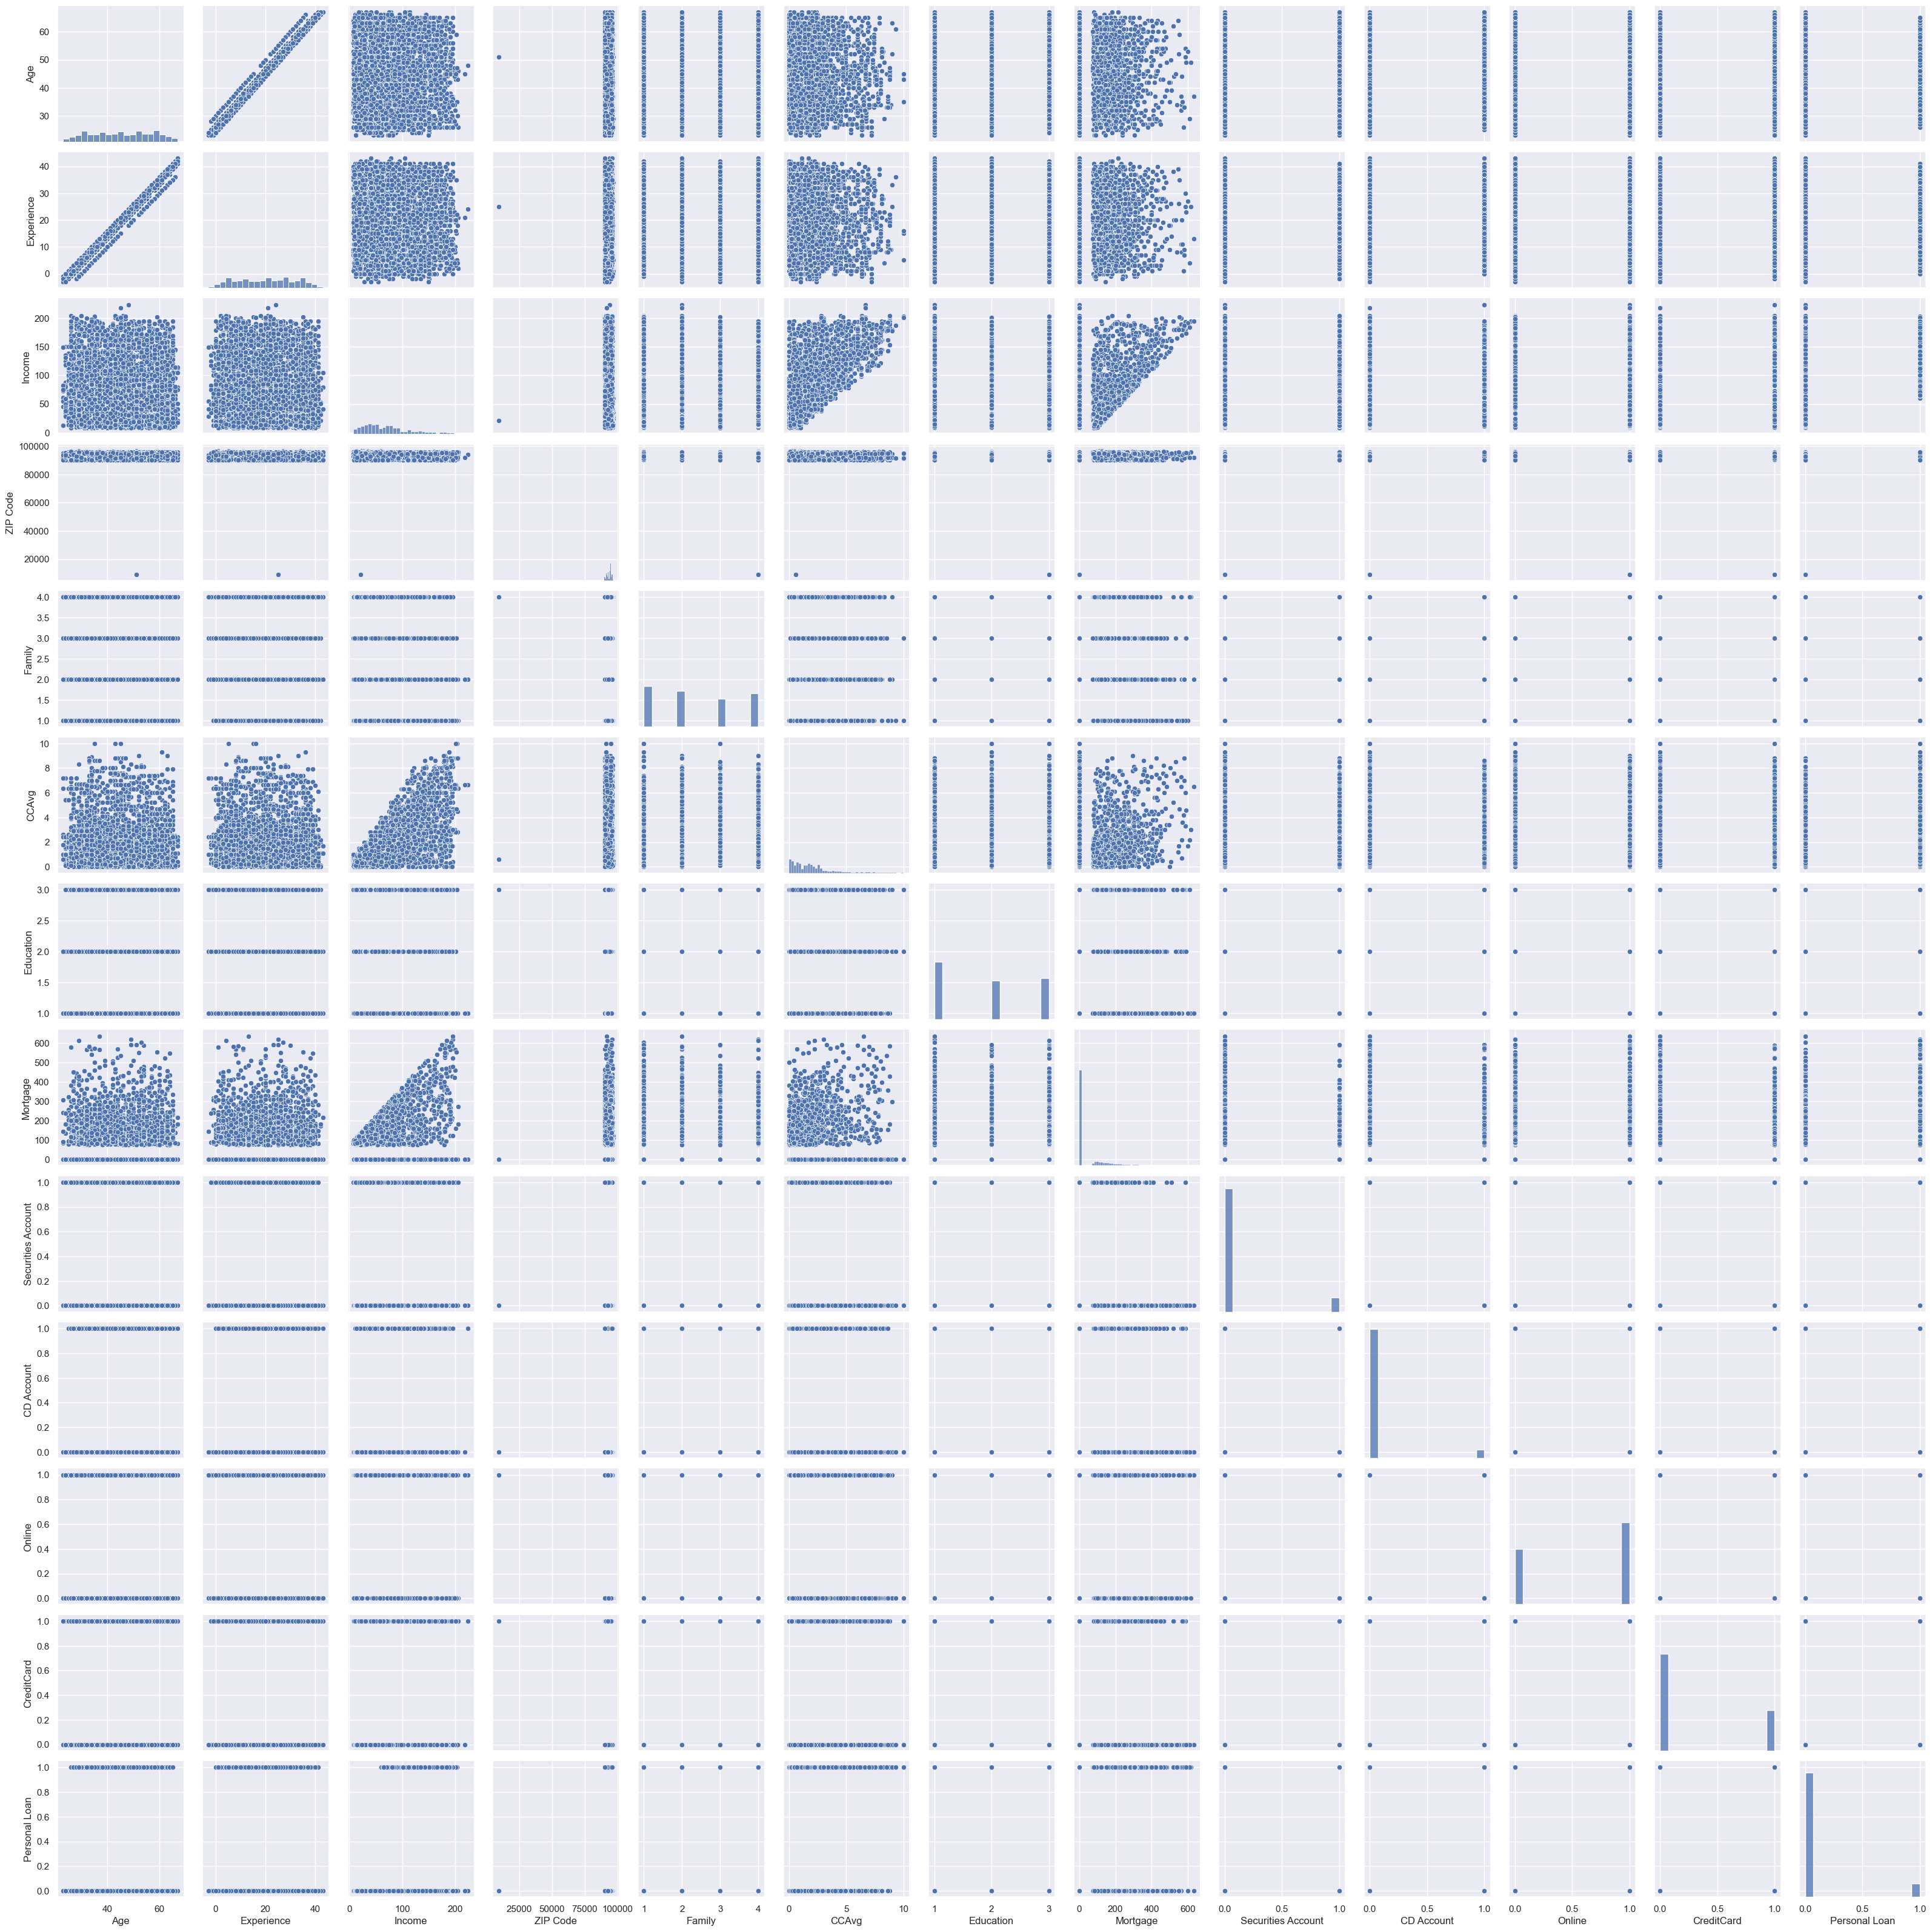

In [13]:
new_df = df[df.columns[1:]]
sns.pairplot(new_df)

From the above pair plot, we can figure out the following about the relationship between the attributes and the goal column:

The "Age" column is spread out regularly. The mean and median are almost the same here, which we've also seen in transpose matrices. People who buy from them are mostly between the ages of 25 and 65.
"Experience" is also spread out in a normal way. In this case, too, mean is almost the same as median. "Experience" and "Age" strongly connect in a good way.
"Income" is shifted to the right, and it will also have the outlier.
There doesn't seem to be any link between the ZIP Code and the other factors.
Family and Education are not very linked to "Personal Loan."
It's also possible that the distribution of CCAvg is skewed in a negative way. Most of the people spend between 1,000 and nine thousand rupees a month on average.
The word "mortgage" is also pleasantly skewed. Most of the people have mortgages that are less than £40,000 each.

2.6 Data cleaning/Handling error

In [14]:
# i am using query method to filter and count negative experience values
negative_experience_counts = df.query('Experience < 0')['Experience'].value_counts()

# displaying the counts
negative_experience_counts



Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [15]:
# counting the number of negative experience values
negative_experience_count = (df['Experience'] < 0).sum()

# displaying the count
negative_experience_count

52

There are 52 records in the collection that have a negative Experience.

Looking at how Experience is linked to other numerical variables:

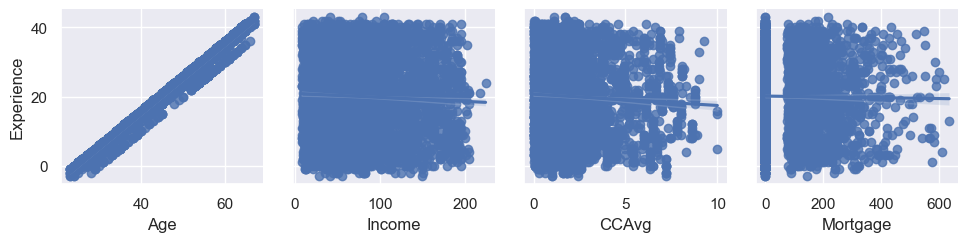

In [16]:
# definin the list of quantitative variables
quantitative_vars = ['Age', 'Income', 'CCAvg', 'Mortgage']

# creating a PairGrid
exp_grid = sns.PairGrid(df, y_vars='Experience', x_vars=quantitative_vars)

# Mmping a regression plot to the PairGrid
exp_grid.map(sns.regplot)


By looking at the plots above, we can see that "Age" is strongly linked to "Experience" in a good way. 'Education' is another idea I'm thinking about to fix the bad experience error. Because, as we all know, experience is linked to schooling level.

Decision: For each negative "Experience" value, we can change it with the middle positive "Experience" value for that "Age" and "Education" value.

What you need to do to follow this code:

Get the experience record that has a number greater than 0.
Get the experience record that has a number less than 0.
Get a list of Customer IDs whose experience value is less than zero.
Get the list of "Age" values where the "Experience" column has negative numbers.
Find out which numbers in the "Education" column are negative and get a list of them.
Next, it selects the records that meet the above conditions from the dataframe that has data with possible experience, finds the middle value, and stores it in exp. There is a chance that there won't be any possible event that fits the above condition. In this case, it fits the above condition from the dataframe, which has the record with the bad experience, gets the middle number, and stores it in exp.
Next, the middle will be put in place of the bad experience.
We will look at the bad experience again after running the code below.


to clean this
First, the data is split into two groups based on whether the "Experience" is positive or negative. Next, the entries with negative "Experience" are looked at over and over again until the median "Experience" of entries with the same "Age" and "Education" but positive "Experience" is found. If none of those records are found, the median of those with negative "Experience" is used instead. Finally, it changes the value of "Experience" to the exact value of this median.

In [17]:
# Create a DataFrame for positive and negative experiences
df_Positive_Experience = df[df['Experience'] > 0]
df_Negative_Experience = df[df['Experience'] < 0]

# Function to calculate replacement experience
def replace_experience(row):
    if row['Experience'] < 0:
        # Filter positive experiences with same age and education
        filtered_df = df_Positive_Experience[(df_Positive_Experience['Age'] == row['Age']) & (df_Positive_Experience['Education'] == row['Education'])]
        
        if not filtered_df.empty:
            return abs(round(filtered_df['Experience'].median()))
        else:
            # Filter negative experiences with same age and education
            filtered_df = df_Negative_Experience[(df_Negative_Experience['Age'] == row['Age']) & (df_Negative_Experience['Education'] == row['Education'])]
            return abs(round(filtered_df['Experience'].median()))
    else:
        return row['Experience']

# Apply the function to the DataFrame
df['Experience'] = df.apply(replace_experience, axis=1)


In [18]:
# counting the number of negative experience values
negative_experience_count = (df['Experience'] < 0).sum()

# displaying the count
negative_experience_count

0

We can now see that the amount of negative values is 0. This means that there are no more negative values in the dataframe.

The count, mean, standard deviation, and five-point breakdown can be found in the "Experience" column.


In [19]:
experience_stats = {
    'count': df['Experience'].count(),
    'mean': df['Experience'].mean(),
    'std': df['Experience'].std(),
    'min': df['Experience'].min(),
    '25%': df['Experience'].quantile(0.25),
    '50%': df['Experience'].median(),
    '75%': df['Experience'].quantile(0.75),
    'max': df['Experience'].max()
}

for stat, value in experience_stats.items():
    print(f"{stat}: {value}")


count: 5000
mean: 20.1348
std: 11.414862626319659
min: 0.0
25%: 10.0
50%: 20.0
75%: 30.0
max: 43.0


nWE ow see the min is 0.0 which was -3.0 before error fixing.

3.0 Visaulisation

here we will look at data distribution in some selected attribute

<Axes: xlabel='Age', ylabel='Count'>

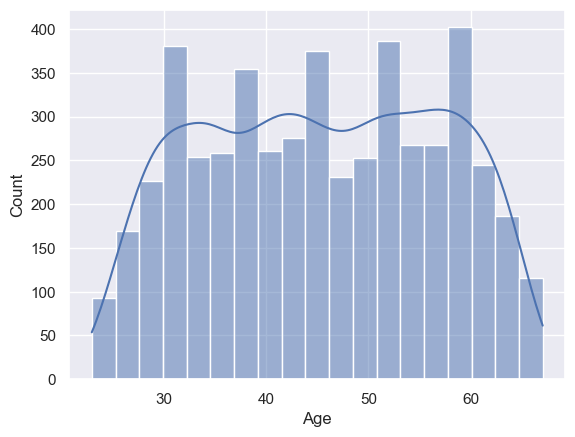

In [20]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Experience', ylabel='Count'>

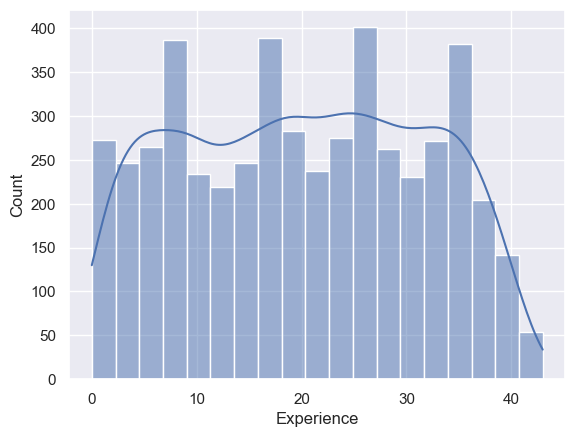

In [21]:
sns.histplot(df['Experience'], kde=True)

<Axes: xlabel='Income', ylabel='Count'>

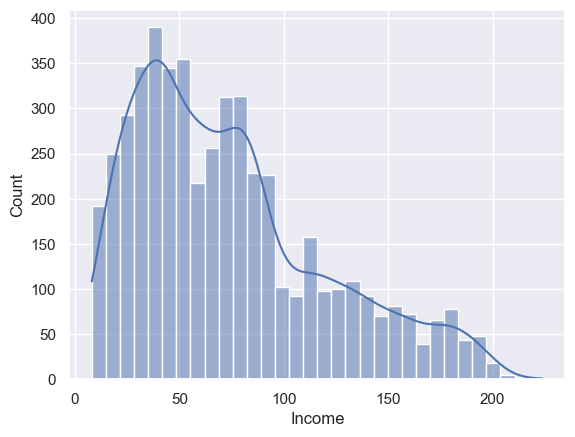

In [22]:
sns.histplot(df['Income'], kde=True)

<Axes: xlabel='Education', ylabel='Count'>

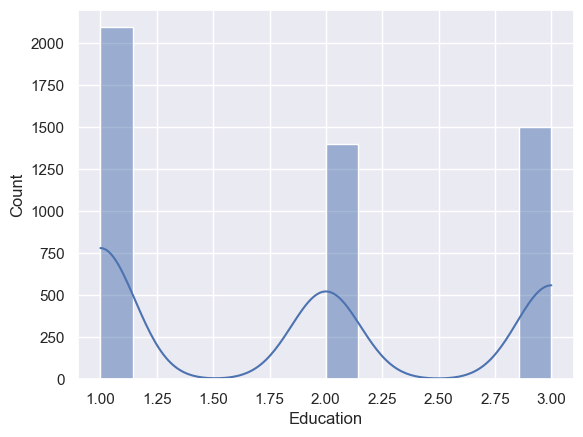

In [23]:
sns.histplot(df['Education'], kde=True)

<Axes: xlabel='CCAvg', ylabel='Count'>

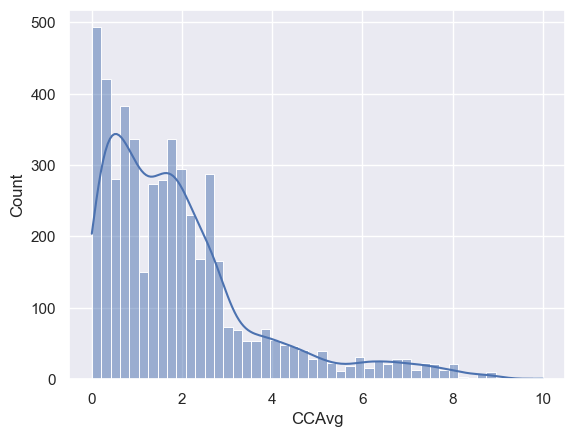

In [24]:
sns.histplot(df['CCAvg'], kde=True)

<Axes: xlabel='Mortgage', ylabel='Count'>

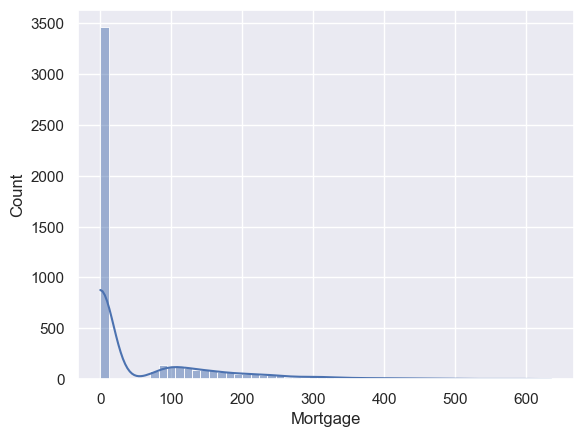

In [25]:
sns.histplot(df['Mortgage'], kde=True)


<Axes: xlabel='CreditCard', ylabel='Count'>

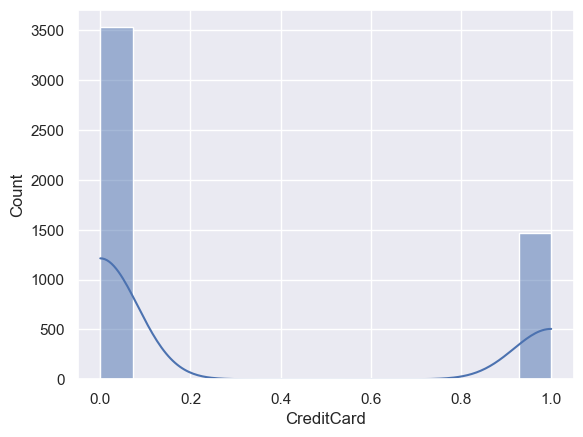

In [26]:
sns.histplot(df['CreditCard'], kde=True)

The age column is spread out .
The Exprience distribution shows that experience is evenly spread out.
The income distribution is right skewed 
The CCAvg distribution has a right skewed distribution, which means that the tail points to the right.
Most people who use credit cards spend between 1,000 and 2,500 pound a month on them. A very small number of credit card customers pay more than 8k a month on average.
in the education distribution There are more buyers at the undergraduate level than at the graduate level or the advanced/professional level.
The mortgages distribution has a right skewed distribution, which means that the tail points to the right. Most of the clients don't have mortgages. 
More people have mortgages that are between 80,000 and 150000. Not many people whose debt is more than £600,000.
creditcard distribution is known as a Bernoulli Distribution. There are almost twice as many people without credit cards as there are with them.


In [27]:
# Counting the values and resetting the index
loan_counts = df["Personal Loan"].value_counts().reset_index()

# Renaming the columns using the 'rename' method
loan_counts = loan_counts.rename(columns={'index': 'Labels', 'Personal Loan': 'Personal Loan'})

# Displaying the DataFrame
loan_counts


,Personal Loan,count
0,0,4520
1,1,480


There are 5000 data points of which 4520 are marked as 0 and 480 are marked as 1. There is a big gap between the percentage of customers who took loans and the percentage of customers who didnt take loans. 

In [28]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns = ["Labels", "Personal Loan"]

In [29]:
print(loan_counts.columns)


Index(['Labels', 'Personal Loan'], dtype='object')


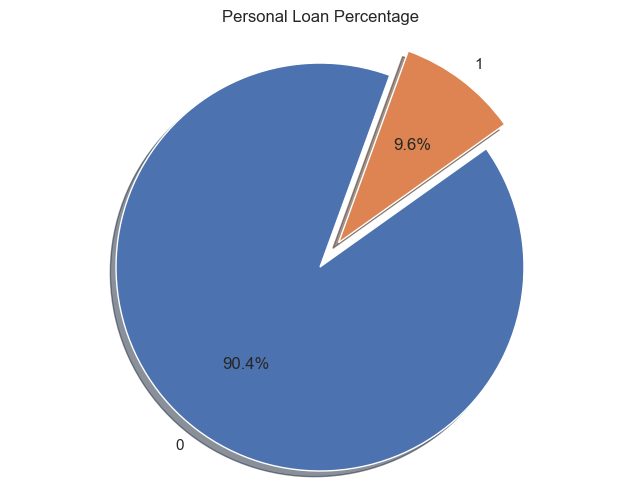

In [30]:
explode = [0, 0.15]  # only "explode" the second slice
plt.figure(figsize=(8, 6))
plt.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%', shadow=True, startangle=70)
plt.axis('equal') 
plt.title("Personal Loan Percentage")
plt.show()


c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.4% of the points

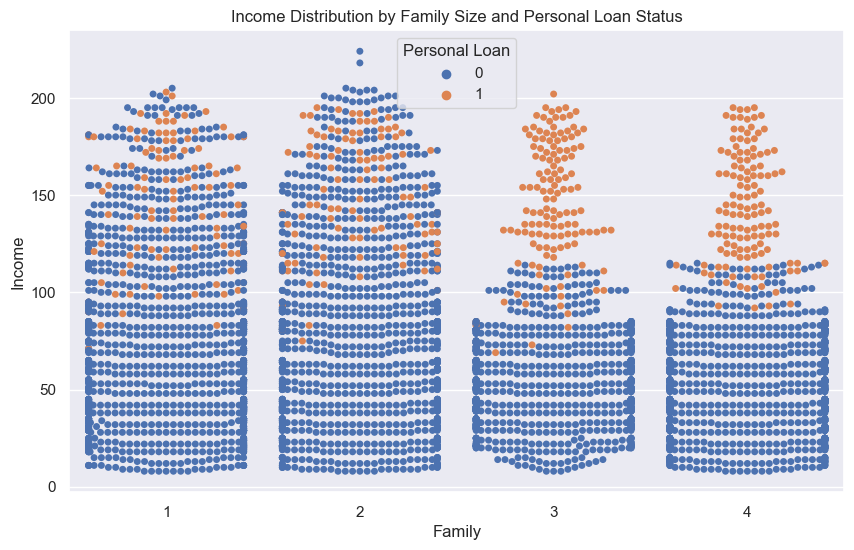

In [31]:
# Creat a swarm plot directly with sns.swarmplot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
sns.swarmplot(x='Family', y='Income', hue='Personal Loan', data=df)


plt.title("Income Distribution by Family Size and Personal Loan Status")
plt.xlabel("Family")
plt.ylabel("Income")
plt.show()

People with a family size of three or more and an income between £100,000 and £200,000 are more likely to take out a loan.


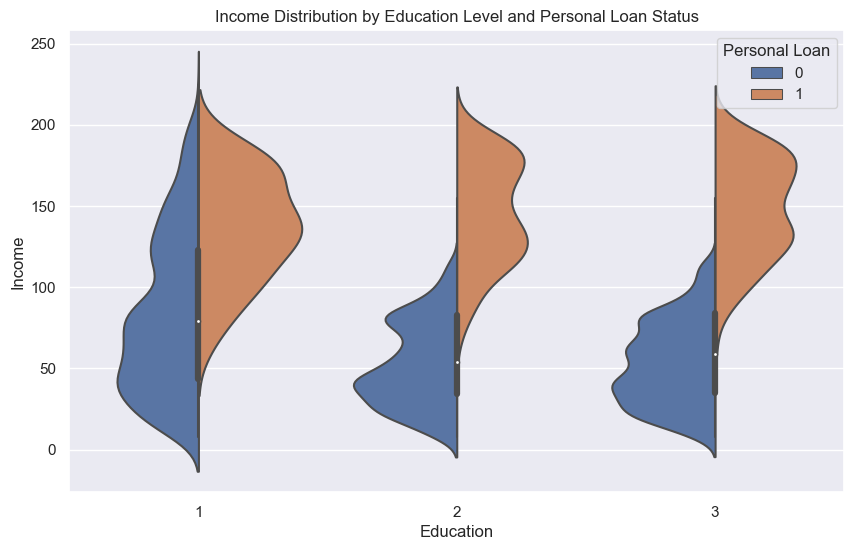

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# used a violin plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
sns.violinplot(x='Education', y='Income', hue='Personal Loan', data=df, split=True)


plt.title("Income Distribution by Education Level and Personal Loan Status")
plt.xlabel("Education")
plt.ylabel("Income")
plt.show()


From what we have thus so far, we can say that people who have took a loan and have at least three people in their family are good buyers. People who took out loans have the same range of income, no matter what amount of education they have. Graduates and above are more likely to be able to get a loan.


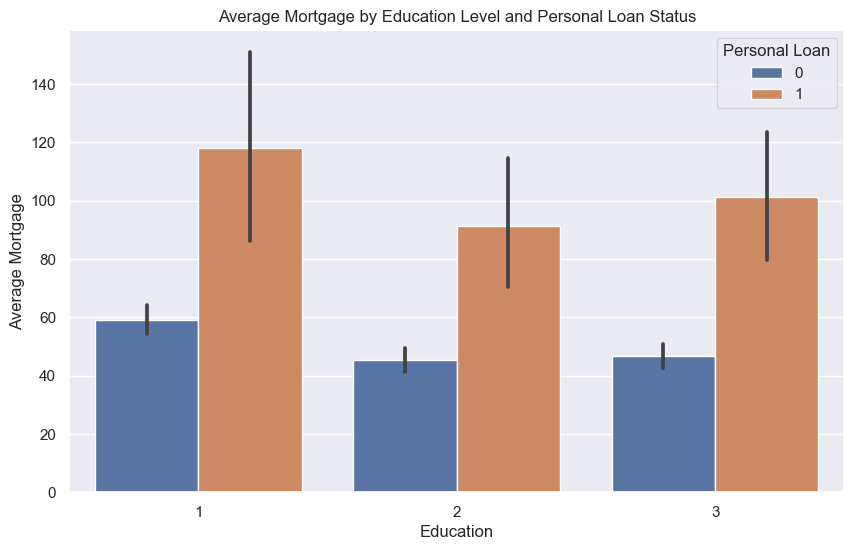

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creating a bar plot
plt.figure(figsize=(10, 6))  
sns.barplot(x='Education', y='Mortgage', hue='Personal Loan', data=df, estimator=np.mean)


plt.title("Average Mortgage by Education Level and Personal Loan Status")
plt.xlabel("Education")
plt.ylabel("Average Mortgage")
plt.show()


People with an education level of 1 who did not take out a loan have a bigger mortgage than people with the same level of education who did take out a loan.
Clients with weducation level is 2 and 3 and did not take loan has lower mortgage than customers who take loan of same education level.

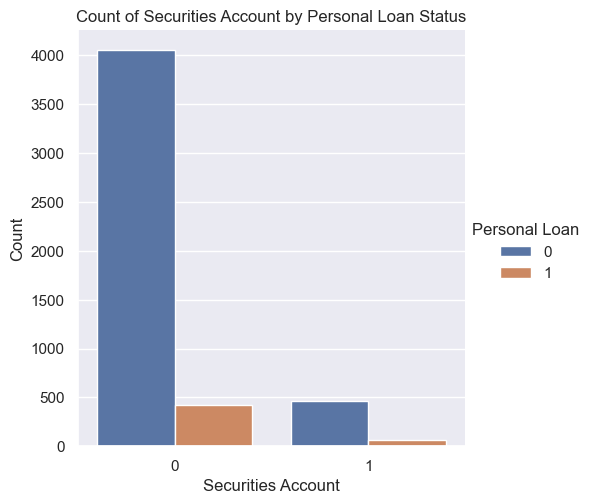

In [34]:
# Creating a count plot using sns.catplot
sns.catplot(x="Securities Account", hue="Personal Loan", data=df, kind='count')

# Optional: Adding title and labels for clarity
plt.title("Count of Securities Account by Personal Loan Status")
plt.xlabel("Securities Account")
plt.ylabel("Count")
plt.show()

People that has a savings account will likely to borrow money. Alot people who don't have loans also don't have securities accounts.

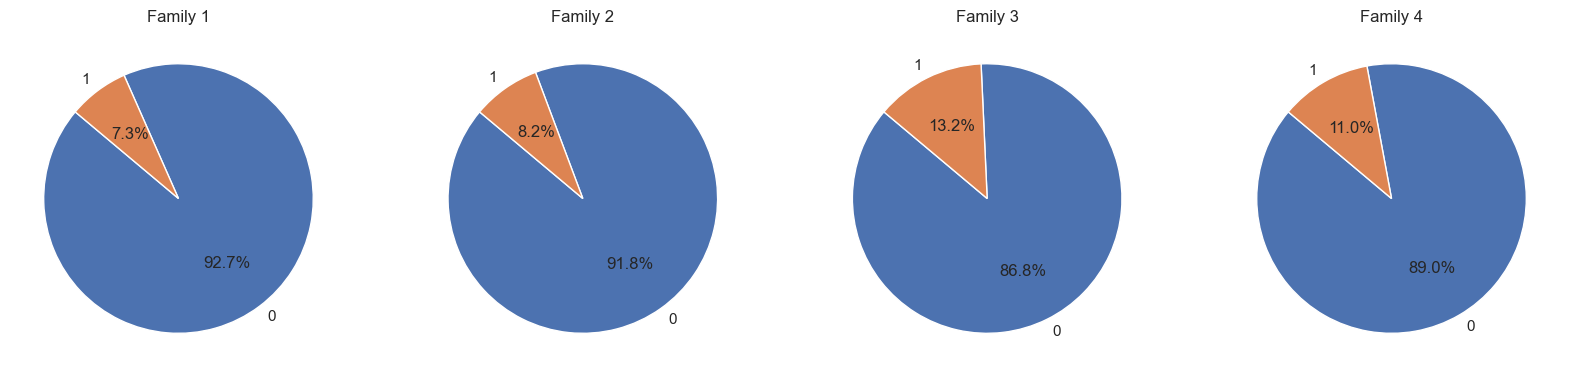

In [35]:


family_values = df['Family'].unique()


fig, axes = plt.subplots(1, len(family_values), figsize=(20, 10))

for i, family in enumerate(sorted(family_values)):
   
    data = df[df['Family'] == family]['Personal Loan'].value_counts()
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Family {family}')

plt.show()


 Family size may not really have an impact on personal loan. But it looks as if families with size of 3 and 4 are more likely to take loan.

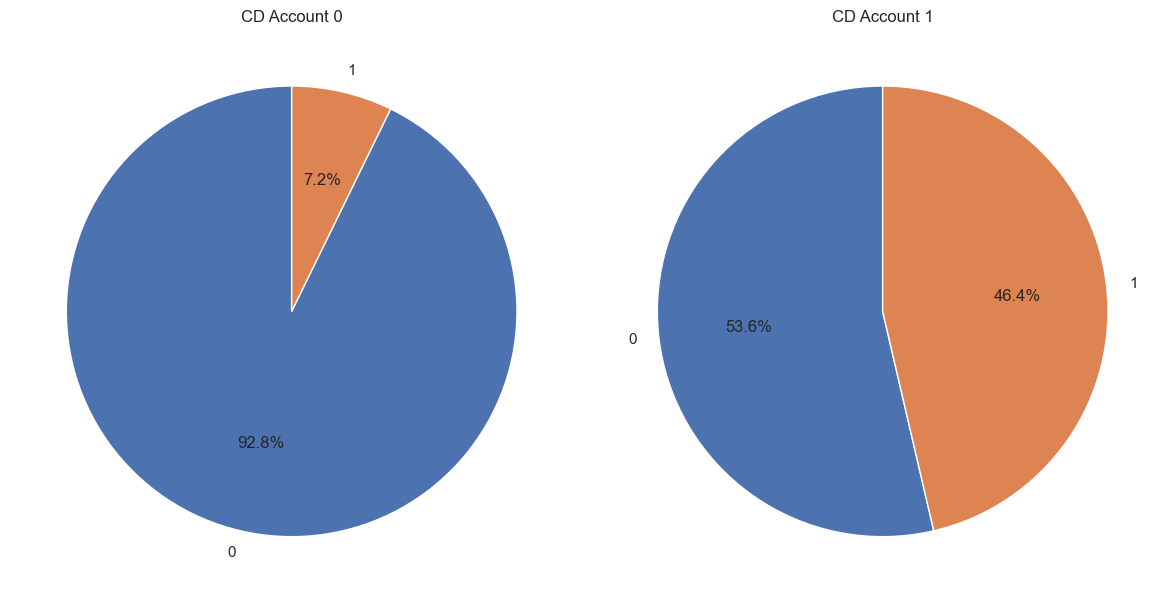

In [36]:

# the code groups the data by 'CD Account' and 'Personal Loan' and counting occurrences
cd_account_data = df.groupby(['CD Account', 'Personal Loan']).size().unstack()

# creates a pie chart for each 'CD Account' category
fig, axes = plt.subplots(1, cd_account_data.shape[0], figsize=(12, 6)) 
for i, (cd_acc, data) in enumerate(cd_account_data.iterrows()):
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'CD Account {cd_acc}')

plt.tight_layout()
plt.show()


People who don't have a CD account also don't have a loan. It looks like this is the majority. But almost every customer with a CD account also has a loan.



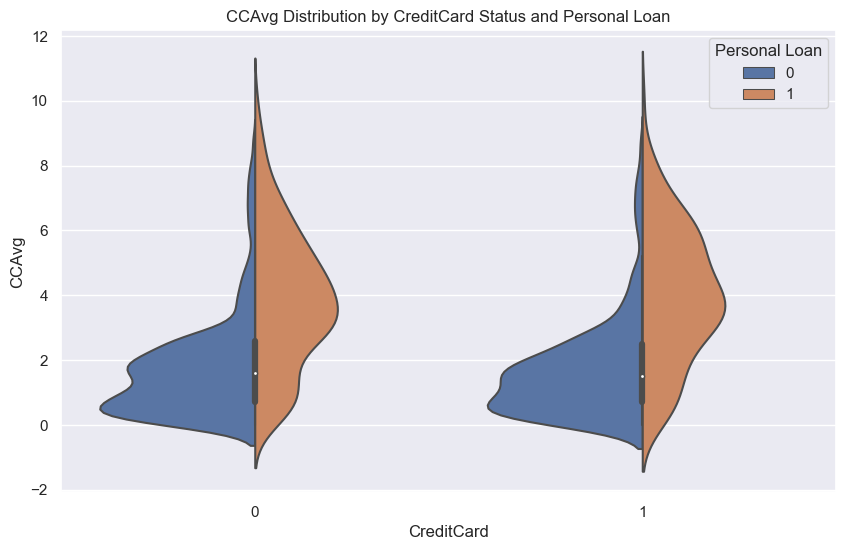

In [37]:

plt.figure(figsize=(10, 6)) 
sns.violinplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df, split=True)


plt.title("CCAvg Distribution by CreditCard Status and Personal Loan")
plt.xlabel("CreditCard")
plt.ylabel("CCAvg")
plt.show()


People who use credit cards and spend a lot each month are more likely to take out a loan.

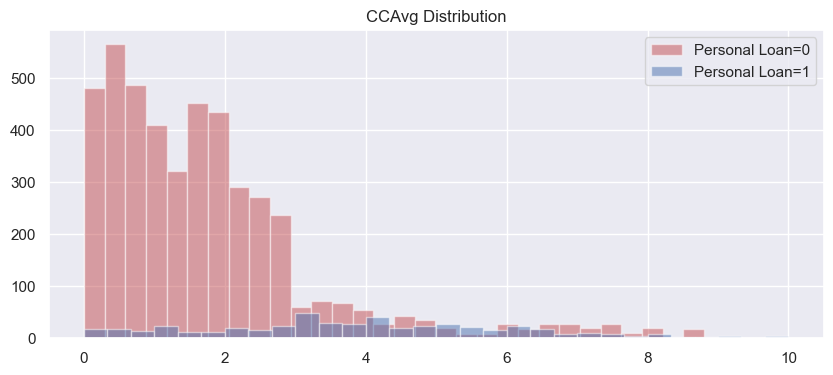

In [38]:


plt.figure(figsize=(10, 4))


plt.hist(df[df["Personal Loan"] == 0]['CCAvg'], bins=30, alpha=0.5, color='r', label='Personal Loan=0')


plt.hist(df[df["Personal Loan"] == 1]['CCAvg'], bins=30, alpha=0.5, color='b', label='Personal Loan=1')


plt.legend()
plt.title("CCAvg Distribution")


plt.show()


People who have taken out personal loans have better credit card scores than people who haven't taken out loans. A high credit card average seems to be a good way to tell if a customer will get a personal loan or not.

In [39]:
# i will group by 'Personal Loan' and calculate median of 'CCAvg'
median_ccavg = df.groupby('Personal Loan')['CCAvg'].median() * 1000

# print out
print('Credit card spending of Non-Loan customers: ', median_ccavg[0])
print('Credit card spending of Loan customers    : ', median_ccavg[1])


Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


The graph shows personal loan holders have higher credit card averages. Personal loans are more likely with a typical credit card usage of £3800. Lower credit card usage (median £1400) reduces loan approvals.

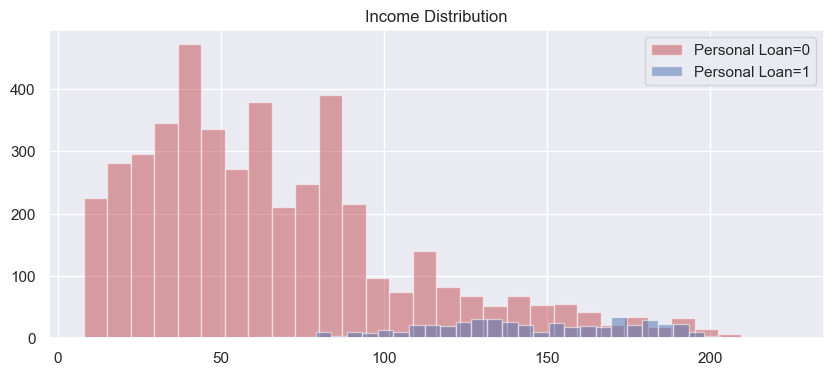

In [40]:
plt.figure(figsize=(10, 4))
plt.hist(df[df["Personal Loan"] == 0]['Income'], bins=30, alpha=0.5, color='r', label='Personal Loan=0')
plt.hist(df[df["Personal Loan"] == 1]['Income'], bins=30, alpha=0.5, color='b', label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")
plt.show()


 Personal loan customers earn more. Thus, high income appears to predict personal loan acceptance.

3.1 Detecting Outliers

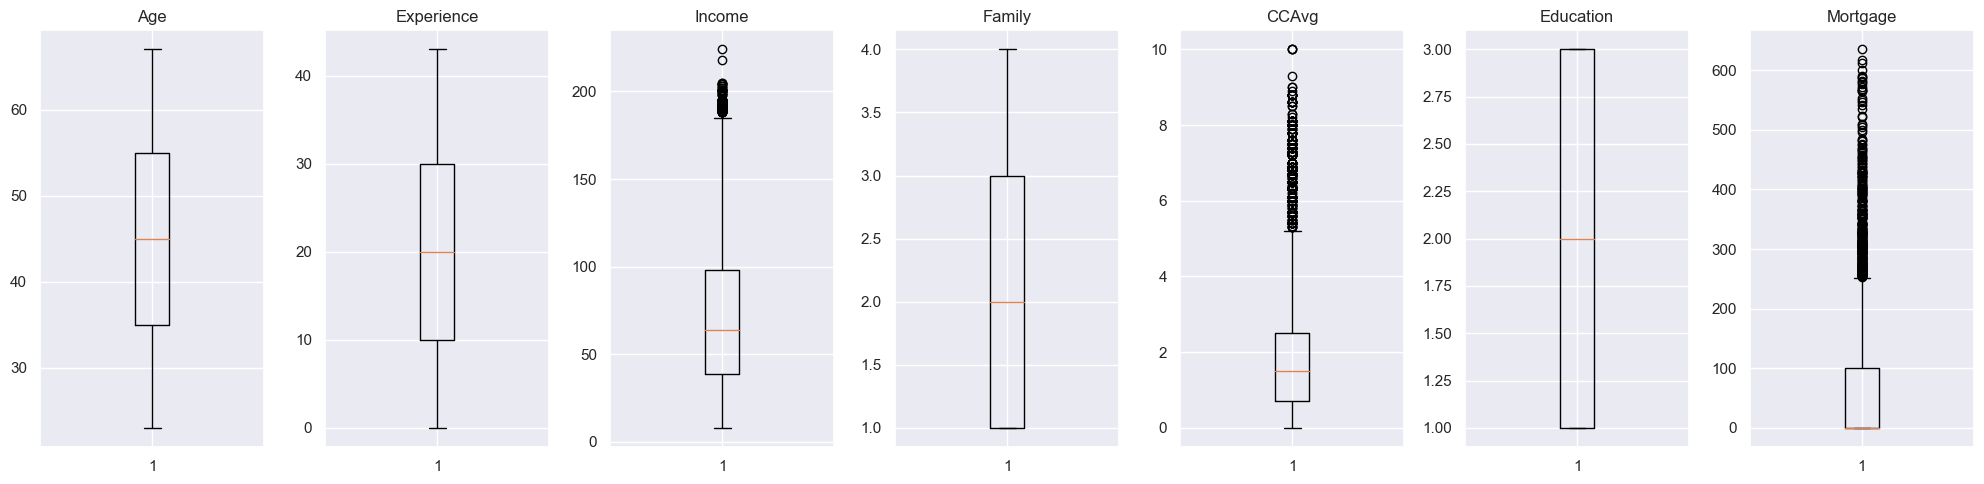

In [82]:
# number of columns in the df you want to keep
num_columns_to_plot = len(df.columns) - 5  # Subtract 5 from the total number of columns

fig, axes = plt.subplots(1, num_columns_to_plot, figsize=(20, 5))
for i, col in enumerate(df.columns[:num_columns_to_plot]):  # Only iterate through the first (len(df.columns) - 5) columns
    axes[i].boxplot(df[col].dropna()) 
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


The boxplot shows outliers on a few columns. Mortgages have more outliers. Outliers exist in income and CCAvg. We'll scale characteristics to fix the outlier.


3.2 Correlation

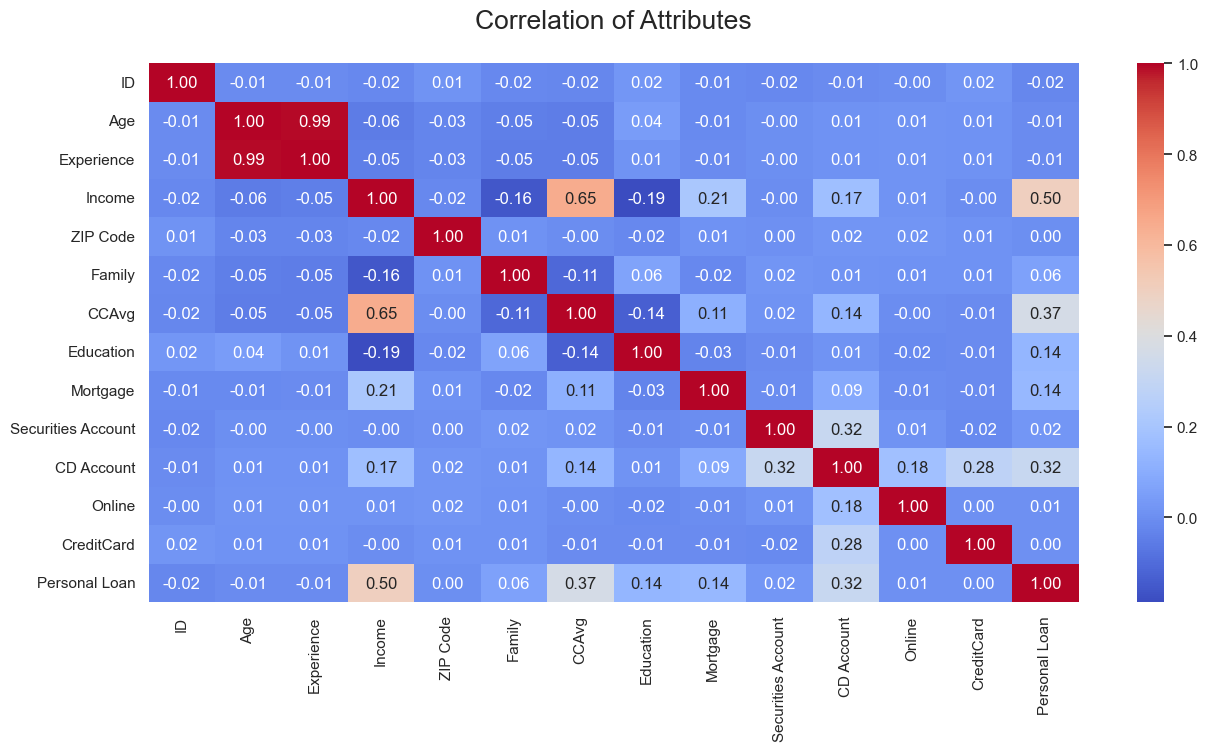

In [42]:
plt.figure(figsize=(15, 7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()


The heatmap shows that:

Age and experience are roughly 1:1 linked.
'Income' and 'CCAvg' correlate marginally.
Personal Loan is most correlated with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
In the heat map above, 'CD Account' is associated with 'Credit Card', 'Securities Account', 'Online', 'CCAvg', and 'Income'.
'Mortgage' correlates mildly with 'Income' at 12%.
'Income' affects 'CCAvg', 'Personal Loan', 'CD Account', and 'Mortgage'

The above shows that age and experience are strongly linked. Experience rises with age. Dropping Experience column lets us design our model.


4.0 Modelling
We will drop id and zip code are they are not useful to our research
Since 'Age' and 'Experience' are significantly connected, we will develop our model with and without experience, evaluate the accuracy, and decide which model is best for prediction.

ID and ZIPCODE drop

In [43]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)


In [44]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1.0,49,4,1.6,1,0,1,0,0,0,0
1,45,19.0,34,3,1.5,1,0,1,0,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,1,0


creating 2 df with and without expirience

In [45]:
#a copy of the original DataFrame
original_loan_df = df.copy()

# a new DataFrame with the experience column dropped
loan_no_experience_df = df.drop(['Experience'], axis=1)


In [46]:
print('Columns With Experience : ', original_loan_df.columns)
print('Columns Without Experience : ', loan_no_experience_df.columns)



Columns With Experience :  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')
Columns Without Experience :  Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')


Separating Target Variable from Independent Variables in Expr and Without Expr dataframe:

In [47]:
X_withExpr = original_loan_df.drop('Personal Loan', axis=1)
Y_withExpr = original_loan_df[['Personal Loan']]


In [48]:
X_No_Expr = loan_no_experience_df.drop('Personal Loan', axis=1)
Y_No_Expr = loan_no_experience_df[['Personal Loan']]


Splitting data into 75:25 training and test sets

In [49]:
from sklearn.model_selection import train_test_split

#split the data into training and test sets
X_withExpr_train, X_withExpr_test, Y_withExpr_train, Y_withExpr_test = train_test_split(X_withExpr, Y_withExpr, test_size=0.25, random_state=1)



In [50]:


#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_No_Expr, Y_No_Expr, test_size=0.25, random_state=1)




Logistic Regression

In [51]:


#train the logistic regression model
logreg_with_expr_model = LogisticRegression()
logreg_with_expr_model.fit(X_withExpr_train, Y_withExpr_train.values.ravel())
#display the model
print(logreg_with_expr_model, '\n')
#Predict on the test set
logreg_with_expr_y_predicted = logreg_with_expr_model.predict(X_withExpr_test)
#calculat the model's accuracy
logreg_with_expr_accuracy = accuracy_score(Y_withExpr_test, logreg_with_expr_y_predicted)
print("Accuracy of Logistic Regression model with Experience feature: {:.2f}%".format(logreg_with_expr_accuracy * 100))
#generat the confusion matrix
logistic_confusion_matrix_with_expr = confusion_matrix(Y_withExpr_test, logreg_with_expr_y_predicted)
print("Confusion Matrix:\n", logistic_confusion_matrix_with_expr)


LogisticRegression() 

Accuracy of Logistic Regression model with Experience feature: 94.64%
Confusion Matrix:
 [[1109   12]
 [  55   74]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:

#train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
#predict on the test set
logreg_y_predicted = logreg_model.predict(X_test)
#galculute the model's accuracy
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
print("Accuracy of Logistic Regression model: {:.2f}%".format(logreg_accuracy * 100))
#generat the confusion matrix
logistic_confusion_matrix = confusion_matrix(y_test, logreg_y_predicted)
print("Confusion Matrix:\n", logistic_confusion_matrix)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic Regression model: 94.08%
Confusion Matrix:
 [[1099   22]
 [  52   77]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
print('Logistic Regression Model Accuracy Score W/O Experience  : {:.2f}%'.format(logreg_accuracy * 100))
print('Logistic Regression Model Accuracy Score With Experience : {:.2f}%'.format(logreg_with_expr_accuracy * 100))
# confusion Matrix
print('\nLogistic Regression Confusion Matrix Without Experience: \n', logistic_confusion_matrix)
print('\nTrue Positive     = ', logistic_confusion_matrix[1][1])
print('True Negative     = ', logistic_confusion_matrix[0][0])
print('False Positive    = ', logistic_confusion_matrix[0][1])
print('False Negative    = ', logistic_confusion_matrix[1][0])
print('\nLogistic Regression Confusion Matrix With Experience: \n', logistic_confusion_matrix_with_expr)
print('\nTrue Positive     = ', logistic_confusion_matrix_with_expr[1][1])
print('True Negative     = ', logistic_confusion_matrix_with_expr[0][0])
print('False Positive    = ', logistic_confusion_matrix_with_expr[0][1])
print('False Negative    = ', logistic_confusion_matrix_with_expr[1][0])


Logistic Regression Model Accuracy Score W/O Experience  : 94.08%
Logistic Regression Model Accuracy Score With Experience : 94.64%

Logistic Regression Confusion Matrix Without Experience: 
 [[1099   22]
 [  52   77]]

True Positive     =  77
True Negative     =  1099
False Positive    =  22
False Negative    =  52

Logistic Regression Confusion Matrix With Experience: 
 [[1109   12]
 [  55   74]]

True Positive     =  74
True Negative     =  1109
False Positive    =  12
False Negative    =  55


From the accuracy data, 'Experience' (94.08%) improves accuracy above no experience (94.64%).
It's also clear from the confusion metrics that 'Experience' predicts loan acceptance and non-acceptance better.
Experience reduces Type 1 and Type 2 errors.
Thus, invoking attributes improves accuracy.
We won't iterate dafaframe without 'Experience'.

Improving the Model
Iteration two

In [54]:
X_withExpr_train_scaled = preprocessing.scale(X_withExpr_train)
X_withExpr_test_scaled = preprocessing.scale(X_withExpr_test)


In [55]:

#train the logistic regression model on scaled data
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_withExpr_train_scaled, Y_withExpr_train.values.ravel())
#predicting on the scaled test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_withExpr_test_scaled)
#calculating the model's accuracy
scaled_logreg_accuracy = accuracy_score(Y_withExpr_test, scaled_logreg_y_predicted)
print("Accuracy of Scaled Logistic Regression model: {:.2f}%".format(scaled_logreg_accuracy * 100))
#enerating the confusion matrix
scaled_logreg_confusion_matrix = confusion_matrix(Y_withExpr_test, scaled_logreg_y_predicted)
print("Confusion Matrix:\n", scaled_logreg_confusion_matrix)


Accuracy of Scaled Logistic Regression model: 94.96%
Confusion Matrix:
 [[1109   12]
 [  51   78]]


In [56]:
from sklearn import metrics

print('----------------------Final Analysis of Logistic Regression----------------------------\n')
print('After Scaling, Logistic Regression Model Accuracy Score with Experience: {:.2f}%'.format(scaled_logreg_accuracy * 100))
print('\nAfter Scaling, Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Positive     = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ', scaled_logreg_confusion_matrix[0][0])
print('False Positive    = ', scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ', scaled_logreg_confusion_matrix[1][0])
print('\nLogistic Regression Classification Report: \n', metrics.classification_report(Y_withExpr_test, scaled_logreg_y_predicted))
#calculating additional metrics
conf_table = scaled_logreg_confusion_matrix
accuracy = (conf_table[0,0] + conf_table[1,1]) / conf_table.sum()
precision = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
recall = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f1_score = (2 * precision * recall) / (precision + recall)

print("Accuracy of accepting Loan  : {:.2f}".format(accuracy))
print("Precision of accepting Loan : {:.2f}".format(precision))
print("Recall of accepting Loan    : {:.2f}".format(recall))
print("F1 Score of accepting Loan  : {:.2f}".format(f1_score))


----------------------Final Analysis of Logistic Regression----------------------------

After Scaling, Logistic Regression Model Accuracy Score with Experience: 94.96%

After Scaling, Logistic Regression Confusion Matrix With Experience: 
 [[1109   12]
 [  51   78]]

True Positive     =  78
True Negative     =  1109
False Positive    =  12
False Negative    =  51

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1121
           1       0.87      0.60      0.71       129

    accuracy                           0.95      1250
   macro avg       0.91      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250

Accuracy of accepting Loan  : 0.95
Precision of accepting Loan : 0.87
Recall of accepting Loan    : 0.60
F1 Score of accepting Loan  : 0.71


K-NN

Find the best K Neighbour

Odd Neighbors:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Scores:  [0.9112, 0.9112, 0.9064, 0.8992, 0.8992, 0.904, 0.9072, 0.9024, 0.9008, 0.8992]

Misclassification Error:  [0.08879999999999999, 0.08879999999999999, 0.09360000000000002, 0.1008, 0.1008, 0.09599999999999997, 0.0928, 0.09760000000000002, 0.09919999999999995, 0.1008]

The optimal number of neighbors (k) is:  1


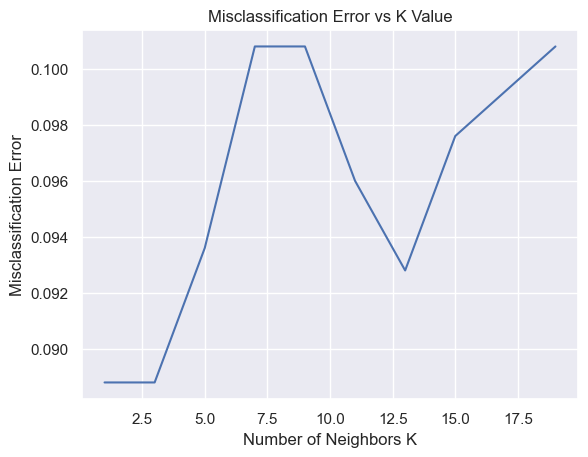

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#generate odd numbers list for K in KNN (1 to 19)
neighbors = [k for k in range(1, 20) if k % 2 != 0]
#listing to store accuracy scores
ac_scores = []
#evaluate accuracy for KNN models with different k values
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())  # Training the model
    y_pred = knn.predict(X_test)  # Predicting using the model
    ac_scores.append(accuracy_score(y_test, y_pred))  # Storing accuracy score

#calculate Misclassification Error
MSE = [1 - x for x in ac_scores]
#find the optimal k with minimum error
optimal_k = neighbors[MSE.index(min(MSE))]
print('Odd Neighbors: ', neighbors)
print('\nAccuracy Scores: ', ac_scores)
print('\nMisclassification Error: ', MSE)
print("\nThe optimal number of neighbors (k) is: ", optimal_k)
#plot Misclassification Error vs. Number of Neighbors
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs K Value')
plt.show()


To decide:

As we can see from the above finding, the misclassification error is low at k = 1.
So, I think that 3 is the best value for k. The accuracy of the model is 0.911 when k=3.
We can also see that error is very low when K is 1. This is shown in the graph of misclassification error vs. k (with k number on the X-axis).
Building a model with the "Without Experience" dataframe:-
We have already made the dataframe and split the logistic regression data, so we will use that too.
Data from the "Without Experience" dataframe was split up: y_train, y_test, X_train, and X_test

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#create the k-NN classifier with the optimal number of neighbors
#use uniform weights and Euclidean distance metric
knn_optimal_model = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', metric='euclidean')
#trranin the model
knn_optimal_model.fit(X_train, y_train)
#maki predictions on the test set
knn_optimal_y_predicted = knn_optimal_model.predict(X_test)
#eval the model
knn_optimal_accuracy = accuracy_score(y_test, knn_optimal_y_predicted)
knn_optimal_confusion_matrix = confusion_matrix(y_test, knn_optimal_y_predicted)

#printout
print("Accuracy of k-NN model with optimal k: {:.2f}%".format(knn_optimal_accuracy * 100))
print("Confusion Matrix of k-NN model:\n", knn_optimal_confusion_matrix)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of k-NN model with optimal k: 91.12%
Confusion Matrix of k-NN model:
 [[1073   48]
 [  63   66]]


Using the "With Experience" dataframe to build a model:-¶
We have already made the dataframe and split the logistic regression data, so we will use that too.
Data from the "With Experience" dataframe was split up

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Instantiating the k-NN classifier with the optimal number of neighbors
knn_model_with_expr = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', metric='euclidean')
#rai the model with the 'Experience' feature
knn_model_with_expr.fit(X_withExpr_train, Y_withExpr_train)
#makin predictions on the test set
knn_with_expr_y_predicted = knn_model_with_expr.predict(X_withExpr_test)
#eval d models accuracy
knn_with_expr_accuracy = accuracy_score(Y_withExpr_test, knn_with_expr_y_predicted)
#generat d confusion matrix
knn_confusion_matrix_with_expr = confusion_matrix(Y_withExpr_test, knn_with_expr_y_predicted)
#printout
print("Accuracy of k-NN model with Experience: {:.2f}%".format(knn_with_expr_accuracy * 100))
print("Confusion Matrix for k-NN model with Experience:\n", knn_confusion_matrix_with_expr)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of k-NN model with Experience: 89.92%
Confusion Matrix for k-NN model with Experience:
 [[1068   53]
 [  73   56]]


Here's a look at the difference between the K-NN Model Accuracy and Confussion Matrix with and without "experience."

In [60]:
print('----------------------Final Analysis of k-NN Models----------------------------\n')

#k-NN model without 'Experience' feature
print('K-NN Confusion Matrix Without Experience: \n', knn_optimal_confusion_matrix)
print('\nTrue Positive     = ', knn_optimal_confusion_matrix[1][1])
print('True Negative     = ', knn_optimal_confusion_matrix[0][0])
print('False Positive    = ', knn_optimal_confusion_matrix[0][1])
print('False Negative    = ', knn_optimal_confusion_matrix[1][0])
print('\nK-NN Model Accuracy Without Experience: {:.2f}%'.format(knn_optimal_accuracy * 100))
#k-NN model with 'Experience' feature
print('\nK-NN Confusion Matrix With Experience: \n', knn_confusion_matrix_with_expr)
print('\nTrue Positive     = ', knn_confusion_matrix_with_expr[1][1])
print('True Negative     = ', knn_confusion_matrix_with_expr[0][0])
print('False Positive    = ', knn_confusion_matrix_with_expr[0][1])
print('False Negative    = ', knn_confusion_matrix_with_expr[1][0])
print('\nK-NN Model Accuracy With Experience: {:.2f}%'.format(knn_with_expr_accuracy * 100))


----------------------Final Analysis of k-NN Models----------------------------

K-NN Confusion Matrix Without Experience: 
 [[1073   48]
 [  63   66]]

True Positive     =  66
True Negative     =  1073
False Positive    =  48
False Negative    =  63

K-NN Model Accuracy Without Experience: 91.12%

K-NN Confusion Matrix With Experience: 
 [[1068   53]
 [  73   56]]

True Positive     =  56
True Negative     =  1068
False Positive    =  53
False Negative    =  73

K-NN Model Accuracy With Experience: 89.92%


Given the accuracy scores, we can see that accuracy is higher when "Experience" is not present (91.12%) than when it is present (89.92%).
This also shows that predicting which customers will not accept a loan and which customers will accept a loan is better without "experience."
Type 1 (False Positive) and Type 2 (False Negative) mistakes happen less often when you don't have experience.
So, calling the traits can help us get more accurate results.
We are not going to use dafaframe "With Experience" for any other versions.
Making the picture better

Step 2: For the K-NN without Experience dataset

In [61]:
from sklearn.preprocessing import StandardScaler

#Create the scaler instance
scaler = StandardScaler()
#Fit the scaler to the training data and transforming
X_train_scaled = scaler.fit_transform(X_train)
#Transform the test data
X_test_scaled = scaler.transform(X_test)


In [62]:
optimal_scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', metric='euclidean')

optimal_scaled_knn_model.fit(X_train_scaled, y_train)

predicted_y_scaled_knn = optimal_scaled_knn_model.predict(X_test_scaled)

accuracy_scaled_knn = accuracy_score(y_test, predicted_y_scaled_knn)

conf_matrix_scaled_knn = confusion_matrix(y_test, predicted_y_scaled_knn)

print("Accuracy of Scaled k-NN Model: {:.2f}%".format(accuracy_scaled_knn * 100))
print("Confusion Matrix of Scaled k-NN Model:\n", conf_matrix_scaled_knn)


c:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of Scaled k-NN Model: 95.68%
Confusion Matrix of Scaled k-NN Model:
 [[1101   20]
 [  34   95]]


In [63]:

print('----------------------Final Analysis of Scaled K-NN----------------------------\n')

# Accuracy of the scaled k-NN model
print('After Scaling K-NN Model Accuracy Score: {:.2f}%'.format(accuracy_scaled_knn * 100))

# Confusion Matrix for the scaled k-NN model
print('\nAfter Scaling K-NN Confusion Matrix: \n', conf_matrix_scaled_knn)
print('\nTrue Positive    = ', conf_matrix_scaled_knn[1][1])
print('True Negative    = ', conf_matrix_scaled_knn[0][0])
print('False Positive   = ', conf_matrix_scaled_knn[0][1])
print('False Negative   = ', conf_matrix_scaled_knn[1][0])

# Classification Report for the scaled k-NN model
print('\nK-NN Classification Report: \n', classification_report(y_test, predicted_y_scaled_knn))

# Calculating additional metrics from the confusion matrix
accuracy = (conf_matrix_scaled_knn[0,0] + conf_matrix_scaled_knn[1,1]) / np.sum(conf_matrix_scaled_knn)
precision = conf_matrix_scaled_knn[1,1] / (conf_matrix_scaled_knn[1,1] + conf_matrix_scaled_knn[0,1])
recall = conf_matrix_scaled_knn[1,1] / (conf_matrix_scaled_knn[1,1] + conf_matrix_scaled_knn[1,0])
f1_score = (2 * precision * recall) / (precision + recall)

# Printing the calculated metrics
print("\nAccuracy of accepting Loan  : {:.2f}".format(accuracy))
print("Precision of accepting Loan : {:.2f}".format(precision))
print("Recall of accepting Loan    : {:.2f}".format(recall))
print("F1 Score of accepting Loan  : {:.2f}".format(f1_score))


----------------------Final Analysis of Scaled K-NN----------------------------

After Scaling K-NN Model Accuracy Score: 95.68%

After Scaling K-NN Confusion Matrix: 
 [[1101   20]
 [  34   95]]

True Positive    =  95
True Negative    =  1101
False Positive   =  20
False Negative   =  34

K-NN Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1121
           1       0.83      0.74      0.78       129

    accuracy                           0.96      1250
   macro avg       0.90      0.86      0.88      1250
weighted avg       0.96      0.96      0.96      1250


Accuracy of accepting Loan  : 0.96
Precision of accepting Loan : 0.83
Recall of accepting Loan    : 0.74
F1 Score of accepting Loan  : 0.78


Naive Bayes

Model with Expirience

In [64]:


#creat and train the model
optimal_gnb_model = GaussianNB()
optimal_gnb_model.fit(X_train, y_train)
#make predictions
predicted_y_gnb = optimal_gnb_model.predict(X_test)
#eval model
accuracy_gnb = accuracy_score(y_test, predicted_y_gnb)
#generat the matrix
conf_matrix_gnb = confusion_matrix(y_test, predicted_y_gnb)
#printout
print("Accuracy of Gaussian Naive Bayes Model: {:.2f}%".format(accuracy_gnb * 100))
print("Confusion Matrix of Gaussian Naive Bayes Model:\n", conf_matrix_gnb)


Accuracy of Gaussian Naive Bayes Model: 87.44%
Confusion Matrix of Gaussian Naive Bayes Model:
 [[1016  105]
 [  52   77]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Without Expirience

In [65]:
#creat and train d model with 'Experience' feature
gnb_with_expr_model = GaussianNB()
gnb_with_expr_model.fit(X_withExpr_train, Y_withExpr_train)
#make predictions 
gnb_with_expr_y_predicted = gnb_with_expr_model.predict(X_withExpr_test)
#eval the 
gnb_with_expr_accuracy = accuracy_score(Y_withExpr_test, gnb_with_expr_y_predicted)
#generat the matrix
gnb_confusion_matrix_with_expr = confusion_matrix(Y_withExpr_test, gnb_with_expr_y_predicted)
#printout
print("Accuracy of Gaussian Naive Bayes Model with Experience: {:.2f}%".format(gnb_with_expr_accuracy * 100))
print("Confusion Matrix for Gaussian Naive Bayes Model with Experience:\n", gnb_confusion_matrix_with_expr)


Accuracy of Gaussian Naive Bayes Model with Experience: 87.52%
Confusion Matrix for Gaussian Naive Bayes Model with Experience:
 [[1016  105]
 [  51   78]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print('----------------------Final Analysis of Gaussian Naive Bayes Models----------------------------\n')


print("Accuracy of Gaussian Naive Bayes Model Without Experience: {:.2f}%".format(accuracy_gnb * 100))
print("Confusion Matrix for Gaussian Naive Bayes Model Without Experience:\n", conf_matrix_gnb)
print('\nTrue Positive     = ', conf_matrix_gnb[1][1])
print('True Negative     = ', conf_matrix_gnb[0][0])
print('False Positive    = ', conf_matrix_gnb[0][1])
print('False Negative    = ', conf_matrix_gnb[1][0])


print("\nAccuracy of Gaussian Naive Bayes Model With Experience: {:.2f}%".format(gnb_with_expr_accuracy * 100))
print("Confusion Matrix for Gaussian Naive Bayes Model With Experience:\n", gnb_confusion_matrix_with_expr)
print('\nTrue Positive     = ', gnb_confusion_matrix_with_expr[1][1])
print('True Negative     = ', gnb_confusion_matrix_with_expr[0][0])
print('False Positive    = ', gnb_confusion_matrix_with_expr[0][1])
print('False Negative    = ', gnb_confusion_matrix_with_expr[1][0])


----------------------Final Analysis of Gaussian Naive Bayes Models----------------------------

Accuracy of Gaussian Naive Bayes Model Without Experience: 87.44%
Confusion Matrix for Gaussian Naive Bayes Model Without Experience:
 [[1016  105]
 [  52   77]]

True Positive     =  77
True Negative     =  1016
False Positive    =  105
False Negative    =  52

Accuracy of Gaussian Naive Bayes Model With Experience: 87.52%
Confusion Matrix for Gaussian Naive Bayes Model With Experience:
 [[1016  105]
 [  51   78]]

True Positive     =  78
True Negative     =  1016
False Positive    =  105
False Negative    =  51


Based on the aforementioned accuracy results, it can be observed that the accuracy levels are nearly identical between the conditions of "without Experience" and "with Experience".
Based on the aforementioned confusion matrices, it is evident that the prediction accuracy for customers who decline a loan and consumers who accept a loan is nearly same when the variable 'Experience' is not considered.
Type I (False Positive) and Type II (False Negative) mistakes are equivalent.
Therefore, it is possible to enhance the accuracy of the results by scaling the attributes.
For subsequent iterations, we can categorize each data frame as either 'With Experience' or 'Without Experience'.

Iteration 2

In [67]:

#scaled Gaussian Naive Bayes model
optimal_scaled_gnb_model = GaussianNB()
optimal_scaled_gnb_model.fit(X_train_scaled, y_train)
#predictions 
predicted_y_scaled_gnb = optimal_scaled_gnb_model.predict(X_test_scaled)
#eval d accuracy
accuracy_scaled_gnb = accuracy_score(y_test, predicted_y_scaled_gnb)
#generat matrix for the scaled model
conf_matrix_scaled_gnb = confusion_matrix(y_test, predicted_y_scaled_gnb)
#printout
print("Accuracy of Scaled Gaussian Naive Bayes Model: {:.2f}%".format(accuracy_scaled_gnb * 100))
print("Confusion Matrix of Scaled Gaussian Naive Bayes Model:\n", conf_matrix_scaled_gnb)


Accuracy of Scaled Gaussian Naive Bayes Model: 87.44%
Confusion Matrix of Scaled Gaussian Naive Bayes Model:
 [[1016  105]
 [  52   77]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
print('----------------------Final Analysis of Scaled Naïve Bayes----------------------------\n')
#accuracy of d scaled model
print('After Scaling Naïve Bayes Model Accuracy Score: {:.2f}%'.format(accuracy_scaled_gnb * 100))

#confusion Matrix 4 d scaled model
print('\nAfter Scaling Naïve Bayes Confusion Matrix: \n', conf_matrix_scaled_gnb)
print('\nTrue Positive     = ', conf_matrix_scaled_gnb[1][1])
print('True Negative     = ', conf_matrix_scaled_gnb[0][0])
print('False Positive    = ', conf_matrix_scaled_gnb[0][1])
print('False Negative    = ', conf_matrix_scaled_gnb[1][0])

#classification Report 
print('\nGaussian Naive Bayes Classification Report: \n', classification_report(y_test, predicted_y_scaled_gnb))
#calculating additional
accuracy = (conf_matrix_scaled_gnb[0,0] + conf_matrix_scaled_gnb[1,1]) / np.sum(conf_matrix_scaled_gnb)
precision = conf_matrix_scaled_gnb[1,1] / (conf_matrix_scaled_gnb[1,1] + conf_matrix_scaled_gnb[0,1])
recall = conf_matrix_scaled_gnb[1,1] / (conf_matrix_scaled_gnb[1,1] + conf_matrix_scaled_gnb[1,0])
f1_score = (2 * precision * recall) / (precision + recall)
#printing d metrics
print("\nAccuracy of accepting Loan  : {:.2f}".format(accuracy))
print("Precision of accepting Loan : {:.2f}".format(precision))
print("Recall of accepting Loan    : {:.2f}".format(recall))
print("F1 Score of accepting Loan  : {:.2f}".format(f1_score))


----------------------Final Analysis of Scaled Naïve Bayes----------------------------

After Scaling Naïve Bayes Model Accuracy Score: 87.44%

After Scaling Naïve Bayes Confusion Matrix: 
 [[1016  105]
 [  52   77]]

True Positive     =  77
True Negative     =  1016
False Positive    =  105
False Negative    =  52

Gaussian Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1121
           1       0.42      0.60      0.50       129

    accuracy                           0.87      1250
   macro avg       0.69      0.75      0.71      1250
weighted avg       0.90      0.87      0.88      1250


Accuracy of accepting Loan  : 0.87
Precision of accepting Loan : 0.42
Recall of accepting Loan    : 0.60
F1 Score of accepting Loan  : 0.50


Support Vector Machine

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Create an instance of the SVC (Support Vector Classifier)
svm_model = SVC()

# Fit the model with the training data
svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))
# Calculate the accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print the accuracy
print("Accuracy of SVM Model: {:.2f}%".format(svm_accuracy * 100))



c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1114    7]
 [ 115   14]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1121
           1       0.67      0.11      0.19       129

    accuracy                           0.90      1250
   macro avg       0.79      0.55      0.57      1250
weighted avg       0.88      0.90      0.87      1250

Accuracy of SVM Model: 90.24%


In [70]:
# Confusion matrix and Evaluation
cm = confusion_matrix(y_test, svm_predictions)
TN, FP, FN, TP = cm.ravel()

print("SVM Model Evaluation")
print("True Negatives: ", TN)
print("False Positives: ", FP)
print("False Negatives: ", FN)
print("True Positives: ", TP)


# Print the accuracy
print("Accuracy of SVM Model: {:.2f}%".format(svm_accuracy * 100))



SVM Model Evaluation
True Negatives:  1114
False Positives:  7
False Negatives:  115
True Positives:  14
Accuracy of SVM Model: 90.24%


In [71]:
#With Expirience

# Create an instance of the SVC (Support Vector Classifier)
svm_model_with = SVC()

# Fit the model with the training data
svm_model_with.fit(X_withExpr_train, Y_withExpr_train)

# Predictions
svm_predictions_with = svm_model_with.predict(X_withExpr_test)

# Evaluate the model
print(confusion_matrix(Y_withExpr_test, svm_predictions_with))
print(classification_report(Y_withExpr_test, svm_predictions_with))
# Calculate the accuracy
svm_accuracy_with = accuracy_score(Y_withExpr_test, svm_predictions_with)

# Print the accuracy
print("Accuracy of SVM Model: {:.2f}%".format(svm_accuracy_with * 100))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1114    7]
 [ 115   14]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1121
           1       0.67      0.11      0.19       129

    accuracy                           0.90      1250
   macro avg       0.79      0.55      0.57      1250
weighted avg       0.88      0.90      0.87      1250

Accuracy of SVM Model: 90.24%


Scaling SVM

In [72]:
# Create an instance of the SVC (Support Vector Classifier)
svm_model = SVC()

# Fit the model with the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predictions using the scaled test data
svm_predictions = svm_model.predict(X_test_scaled)

# Confusion matrix and Evaluation
cm_scaled_svc = confusion_matrix(y_test, svm_predictions)
TN_svc, FP_svc, FN_svc, TP_svc = cm_scaled_svc.ravel()

print("SVM Model Evaluation")
print(classification_report(y_test, svm_predictions))
print("True Negatives: ", TN_svc)
print("False Positives: ", FP_svc)
print("False Negatives: ", FN_svc)
print("True Positives: ", TP_svc)
# Calculate the accuracy
svm_accuracy_scaled = accuracy_score(y_test, svm_predictions)

# Print the accuracy
print("Accuracy of SVM Model: {:.2f}%".format(svm_accuracy_scaled * 100))



c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Model Evaluation
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1121
           1       0.97      0.74      0.84       129

    accuracy                           0.97      1250
   macro avg       0.97      0.87      0.91      1250
weighted avg       0.97      0.97      0.97      1250

True Negatives:  1118
False Positives:  3
False Negatives:  34
True Positives:  95
Accuracy of SVM Model: 97.04%


Radom Forest classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)  # You can tune the number of trees

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

rf_accuracy = accuracy_score(y_test, rf_predictions)

# Print the accuracy
print("Accuracy of Random Forest Model: {:.2f}%".format(rf_accuracy * 100))




c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[1119    2]
 [  18  111]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1121
           1       0.98      0.86      0.92       129

    accuracy                           0.98      1250
   macro avg       0.98      0.93      0.95      1250
weighted avg       0.98      0.98      0.98      1250

Accuracy of Random Forest Model: 98.40%


In [74]:


# Confusion matrix and Evaluation
cm = confusion_matrix(y_test, rf_predictions)
TN, FP, FN, TP = cm.ravel()

print("Random Forest Model Evaluation")
print("True Negatives: ", TN)
print("False Positives: ", FP)
print("False Negatives: ", FN)
print("True Positives: ", TP)

# Print the accuracy
print("Accuracy of Random Forest Model: {:.2f}%".format(rf_accuracy * 100))


Random Forest Model Evaluation
True Negatives:  1119
False Positives:  2
False Negatives:  18
True Positives:  111
Accuracy of Random Forest Model: 98.40%


In [75]:
#With Expirience

# Create a Random Forest Classifier
rf_model_with = RandomForestClassifier(n_estimators=100)  # You can tune the number of trees

# Fit the model
rf_model_with.fit(X_withExpr_train, Y_withExpr_train)

# Predictions
rf_predictions_with = rf_model_with.predict(X_withExpr_test)

# Evaluate the model
print(confusion_matrix(Y_withExpr_test, rf_predictions_with))
print(classification_report(Y_withExpr_test, rf_predictions_with))

rf_accuracy_with = accuracy_score(Y_withExpr_test, rf_predictions_with)

# Print the accuracy
print("Accuracy of Random Forest Model: {:.2f}%".format(rf_accuracy_with * 100))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[1119    2]
 [  20  109]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1121
           1       0.98      0.84      0.91       129

    accuracy                           0.98      1250
   macro avg       0.98      0.92      0.95      1250
weighted avg       0.98      0.98      0.98      1250

Accuracy of Random Forest Model: 98.24%


Scaling Random forest classifier

In [76]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)

# Fit the model with the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predictions using the scaled test data
rf_predictions = rf_model.predict(X_test_scaled)

# Confusion matrix and Evaluation
cm_scaled_rf = confusion_matrix(y_test, rf_predictions)
TN_rf, FP_rf, FN_rf, TP_rf = cm_scaled_rf.ravel()

print("Random Forest Model Evaluation")
print(classification_report(y_test, rf_predictions))
print("True Negatives: ", TN_rf)
print("False Positives: ", FP_rf)
print("False Negatives: ", FN_rf)
print("True Positives: ", TP_rf)
rf_accuracy_scaled = accuracy_score(y_test, rf_predictions)

# Print the accuracy
print("Accuracy of Random Forest Model: {:.2f}%".format(rf_accuracy_scaled * 100))


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Model Evaluation
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1121
           1       0.97      0.85      0.91       129

    accuracy                           0.98      1250
   macro avg       0.98      0.93      0.95      1250
weighted avg       0.98      0.98      0.98      1250

True Negatives:  1118
False Positives:  3
False Negatives:  19
True Positives:  110
Accuracy of Random Forest Model: 98.24%


Decision tree Clasifier

In [77]:
import time
start_time = time.time()
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X_train, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

# Calculate the accuracy and store it in a variable
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Print the accuracy
print("Accuracy of Decision Tree Model: {:.2f}%".format(dt_accuracy * 100))
end_time = time.time()
computation_time = end_time - start_time
print("Computation Time: ", computation_time)

[[1108   13]
 [  18  111]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1121
           1       0.90      0.86      0.88       129

    accuracy                           0.98      1250
   macro avg       0.94      0.92      0.93      1250
weighted avg       0.97      0.98      0.97      1250

Accuracy of Decision Tree Model: 97.52%
Computation Time:  0.16867494583129883


In [78]:
# Confusion matrix and Evaluation
cm = confusion_matrix(y_test, dt_predictions)
TN, FP, FN, TP = cm.ravel()

print("Decision Tree Model Evaluation")
print("True Negatives: ", TN)
print("False Positives: ", FP)
print("False Negatives: ", FN)
print("True Positives: ", TP)


# Print the accuracy
print("Accuracy of Decision Tree Model: {:.2f}%".format(dt_accuracy * 100))

Decision Tree Model Evaluation
True Negatives:  1108
False Positives:  13
False Negatives:  18
True Positives:  111
Accuracy of Decision Tree Model: 97.52%


In [79]:
# Create a Decision Tree Classifier
dt_model_with = DecisionTreeClassifier()

# Fit the model
dt_model_with.fit(X_withExpr_train, Y_withExpr_train)

# Predictions
dt_predictions_with = dt_model_with.predict(X_withExpr_test)

# Evaluate the model
print(confusion_matrix(Y_withExpr_test, dt_predictions_with))
print(classification_report(Y_withExpr_test, dt_predictions_with))

# Calculate the accuracy and store it in a variable
dt_accuracy_with = accuracy_score(y_test, dt_predictions_with)

# Print the accuracy
print("Accuracy of Decision Tree Model: {:.2f}%".format(dt_accuracy_with * 100))

[[1109   12]
 [  13  116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1121
           1       0.91      0.90      0.90       129

    accuracy                           0.98      1250
   macro avg       0.95      0.94      0.95      1250
weighted avg       0.98      0.98      0.98      1250

Accuracy of Decision Tree Model: 98.00%


Scaling the Decision Tree Classfier

In [80]:
# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Fit the model with the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Predictions using the scaled test data
dt_predictions = dt_model.predict(X_test_scaled)

# Confusion matrix and Evaluation
cm_scaled_dtc = confusion_matrix(y_test, dt_predictions)
TN_dtc, FP_dtc, FN_dtc, TP_dtc = cm_scaled_dtc.ravel()

print("Decision Tree Model Evaluation")
print(classification_report(y_test, dt_predictions))
print("True Negatives: ", TN_dtc)
print("False Positives: ", FP_dtc)
print("False Negatives: ", FN_dtc)
print("True Positives: ", TP_dtc)
# Calculate the accuracy and store it in a variable
dt_accuracy_scaled = accuracy_score(y_test, dt_predictions)

# Print the accuracy
print("Accuracy of Decision Tree Model: {:.2f}%".format(dt_accuracy_scaled * 100))


Decision Tree Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1121
           1       0.90      0.88      0.89       129

    accuracy                           0.98      1250
   macro avg       0.94      0.94      0.94      1250
weighted avg       0.98      0.98      0.98      1250

True Negatives:  1108
False Positives:  13
False Negatives:  15
True Positives:  114
Accuracy of Decision Tree Model: 97.76%


Comparing the 6 Models

Overall Model Accuracy After Scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 96%
Naive Bayes         : 87%
Support Vector Machine : 97%
Random Forest       : 98%
Decision Tree       : 98%

Overall Model Confusion Matrix After Scaling:


Logistic Regression: 
 [[1109   12]
 [  51   78]]

    True Positive    =  78
    True Negative     =  1109
    False Positive    =  12
    False Negative    =  51

K-Nearest Neighbors: 
 [[1101   20]
 [  34   95]]

    True Positive    =  95
    True Negative     =  1101
    False Positive    =  20
    False Negative    =  34

Naive Bayes: 
 [[1016  105]
 [  52   77]]

    True Positive    =  77
    True Negative     =  1016
    False Positive    =  105
    False Negative    =  52

Support Vector Machine: 
 [[1118    3]
 [  34   95]]

    True Positive    =  95
    True Negative     =  1118
    False Positive    =  3
    False Negative    =  34

Random Forest: 
 [[1118    3]
 [  19  110]]

    True Positive    =  110
    True Negative     =  

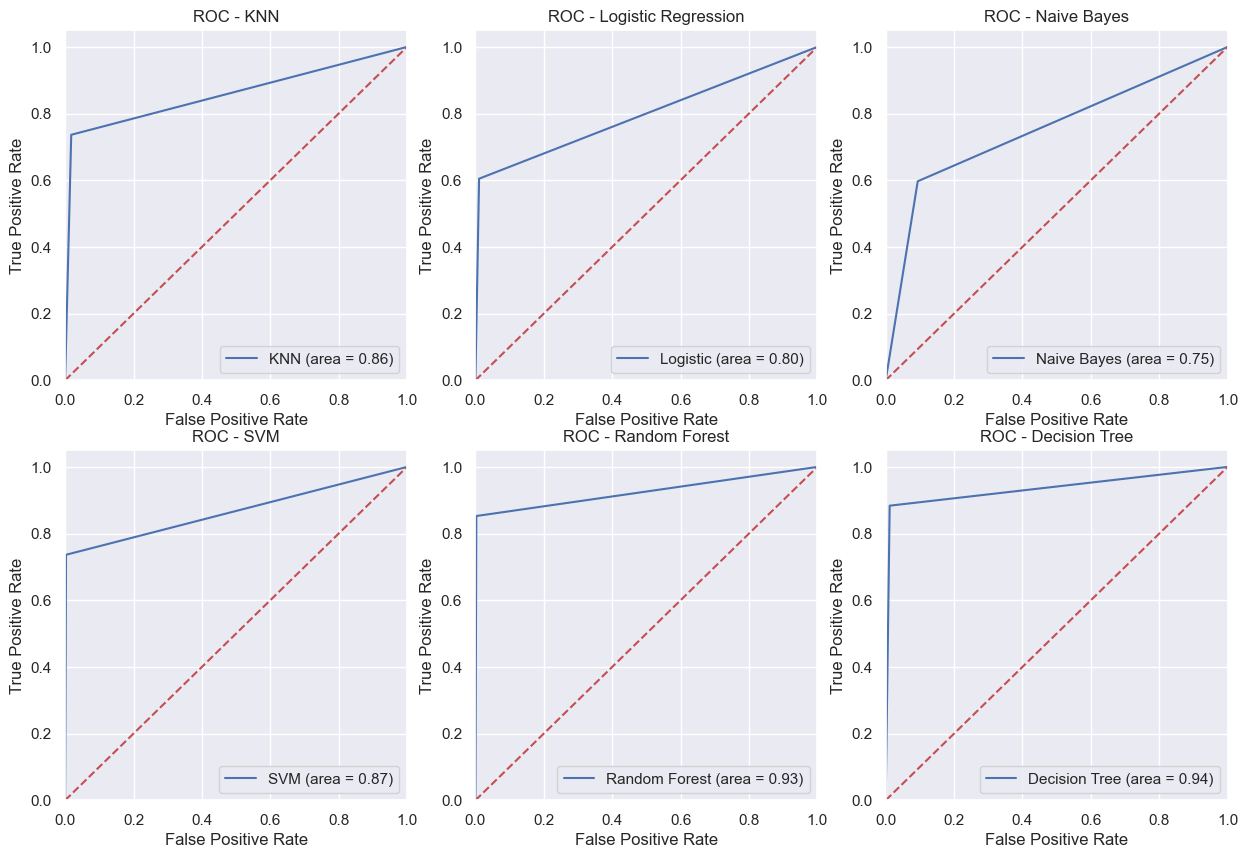

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt


print('Overall Model Accuracy After Scaling:\n')
print('Logistic Regression : {:.0f}%'.format(scaled_logreg_accuracy * 100))
print('K-Nearest Neighbors : {:.0f}%'.format(accuracy_scaled_knn * 100))  
print('Naive Bayes         : {:.0f}%'.format(accuracy_scaled_gnb * 100))
print('Support Vector Machine : {:.0f}%'.format(svm_accuracy_scaled * 100))
print('Random Forest       : {:.0f}%'.format(rf_accuracy_scaled * 100))
print('Decision Tree       : {:.0f}%'.format(dt_accuracy_scaled * 100))

print('\nOverall Model Confusion Matrix After Scaling:\n')

# Logistic Regression
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n    True Positive    = ', scaled_logreg_confusion_matrix[1][1])
print('    True Negative     = ', scaled_logreg_confusion_matrix[0][0])
print('    False Positive    = ', scaled_logreg_confusion_matrix[0][1])
print('    False Negative    = ', scaled_logreg_confusion_matrix[1][0])

# K-Nearest Neighbors
print('\nK-Nearest Neighbors: \n', conf_matrix_scaled_knn)  
print('\n    True Positive    = ', conf_matrix_scaled_knn[1][1])
print('    True Negative     = ', conf_matrix_scaled_knn[0][0])
print('    False Positive    = ', conf_matrix_scaled_knn[0][1])
print('    False Negative    = ', conf_matrix_scaled_knn[1][0])

# Naive Bayes
print('\nNaive Bayes: \n', conf_matrix_scaled_gnb)
print('\n    True Positive    = ', conf_matrix_scaled_gnb[1][1])
print('    True Negative     = ', conf_matrix_scaled_gnb[0][0])
print('    False Positive    = ', conf_matrix_scaled_gnb[0][1])
print('    False Negative    = ', conf_matrix_scaled_gnb[1][0])

# SVM
print('\nSupport Vector Machine: \n', cm_scaled_svc)
print('\n    True Positive    = ', TP_svc)
print('    True Negative     = ', TN_svc)
print('    False Positive    = ', FP_svc)
print('    False Negative    = ', FN_svc)

# Random Forest
print('\nRandom Forest: \n', cm_scaled_rf)
print('\n    True Positive    = ', TP_rf)
print('    True Negative     = ', TN_rf)
print('    False Positive    = ', FP_rf)
print('    False Negative    = ', FN_rf)

# Decision Tree
print('\nDecision Tree: \n', cm_scaled_dtc)
print('\n    True Positive    = ', TP_dtc)
print('    True Negative     = ', TN_dtc)
print('    False Positive    = ', FP_dtc)
print('    False Negative    = ', FN_dtc)

# ROC Curves
print('\nReceiver Operating Characteristic (ROC) Curve to Evaluate Classifier Output Quality.')

plt.figure(figsize=(15, 10))

# K-NN ROC Curve
knn_fpr, knn_tpr, _ = roc_curve(y_test, predicted_y_scaled_knn)
knn_roc_auc = auc(knn_fpr, knn_tpr)
plt.subplot(2, 3, 1)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = {:.2f})'.format(knn_roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - KNN')
plt.legend(loc='lower right')

# Logistic Regression ROC Curve
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, scaled_logreg_y_predicted)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)
plt.subplot(2, 3, 2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (area = {:.2f})'.format(logistic_roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc='lower right')

# Naive Bayes ROC Curve
nb_fpr, nb_tpr, _ = roc_curve(y_test, predicted_y_scaled_gnb)
nb_roc_auc = auc(nb_fpr, nb_tpr)
plt.subplot(2, 3, 3)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = {:.2f})'.format(nb_roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Naive Bayes')
plt.legend(loc='lower right')

# Add similar plots for SVM, Random Forest, and Decision Tree

# SVM ROC Curve
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
svm_roc_auc = auc(svm_fpr, svm_tpr)
plt.subplot(2, 3, 4)
plt.plot(svm_fpr, svm_tpr, label='SVM (area = {:.2f})'.format(svm_roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM')
plt.legend(loc='lower right')

# Random Forest ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.subplot(2, 3, 5)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = {:.2f})'.format(rf_roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc='lower right')

# Decision Tree ROC Curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)
dt_roc_auc = auc(dt_fpr, dt_tpr)
plt.subplot(2, 3, 6)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = {:.2f})'.format(dt_roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc='lower right')

plt.show()


ROC Curves Analysis:

K-Nearest Neighbors (KNN): The ROC curve shows that the KNN model has an area under the curve (AUC) of 0.86, indicating a good ability to distinguish between the positive and negative classes.
Logistic Regression: The AUC for Logistic Regression is 0.80, which is slightly lower than KNN, suggesting that Logistic Regression is less effective at discrimination than KNN in this case.
Naive Bayes: The Naive Bayes model has an AUC of 0.75, which is the lowest among the models presented, indicating it has a lesser degree of separability between the classes.
Support Vector Machine (SVM): The SVM shows a high AUC of 0.87, suggesting it is quite effective at differentiating the classes.
Random Forest: The Random Forest model has a very high AUC of 0.92, making it the most effective among the models at discriminating between positive and negative instances.
Decision Tree: The Decision Tree model has the highest AUC of 0.94, which is exceptional and indicates excellent model performance.

Accuracy and Confusion Matrix Analysis:

Logistic Regression has a high accuracy of 95%, with a relatively higher number of false negatives.
KNN has a slightly higher accuracy of 96% and a balanced false positive and false negative rate.
Naive Bayes has the lowest accuracy at 87%, with significantly more false positives than the other models, which could indicate a higher rate of type I errors.
SVM has a high accuracy of 97% and very few false positives, which is excellent for scenarios where false alarms are costly.
Random Forest has an accuracy of 98%, with very few false positives and false negatives, indicating a well-balanced and high-performing model.
Decision Tree also has an accuracy of 98%, with a slightly higher false positive rate than Random Forest but still very strong performance.

When comparing the performance of the Random Forest and Decision Tree models based solely on the AUC value, the Decision Tree has a marginally higher AUC (0.94) compared to the Random Forest (0.92). This suggests that the Decision Tree model has a slightly better ability to discriminate between the positive and negative classes.
However, when evaluating models, we often consider more than just the AUC. It's important to look at the full picture, which includes considering the confusion matrix, precision, recall, F1-score, and the specific context in which the model will be used. The AUC gives an aggregate measure of performance across all classification thresholds, but it doesn't tell us about the model's performance at a specific point on the ROC curve where you might choose to set a threshold for your application.
For instance, a Decision Tree might have a higher AUC but could be overfitting to the training data, which might not generalize well to unseen data. Random Forest, being an ensemble method, generally has better generalization capabilities as it reduces overfitting by averaging the results of multiple decision trees trained on different subsets of the dataset.
Therefore, even though the Decision Tree shows a higher AUC, the Random Forest may still be considered "better" in a broader context due to its robustness and generalization properties. Moreover, Random Forest typically offers more consistent performance, especially on unseen data, which is a critical factor in model selection.

Overall Comparison:

The tree-based models (Random Forest and Decision Tree) show superior performance in terms of both AUC and accuracy.
SVM also performs very well, particularly in minimizing false positives.
While Naive Bayes has the lowest accuracy and AUC, it may still be useful in certain contexts due to its simplicity and speed.
Logistic Regression and KNN show good but not exceptional performance compared to the tree-based models and SVM.

In summary, while the AUC of the Decision Tree is higher, the Random Forest may still be preferred for its ability to generalize better, which can be crucial for practical applications. It is important to consider the performance on the validation set and, if possible, the real-world performance to truly determine which model is the most effective for a given task.

In conclusion, if the priority is to minimize false positives and negatives while maintaining high accuracy, Random Forest and Decision Tree models are the best performers in this analysis. However, each model has its strengths and could be chosen based on the specific costs of false positives and false negatives in the application context.